In [0]:
# Use Case: Free wifi 

# Setup your imports
import requests as r
from itertools import product
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Credentials
key = 'key'
url = 'https://api.yelp.com/v3/businesses/search'
headers = {
    'Authorization': 'Bearer %s' % key,
}

In [14]:
# Sample Scrape
search_parameters = {'location': '1200 West 7th Street, Los Angeles CA 90017',
                     'limit': 2,
                     'term': 'free wifi',
                     'radius': 805,
                     'offset': 50,
                     }
response = r.get(url, headers=headers, params=search_parameters)
response.json()

# *** Make sure to explore response to ID key items we want

{'businesses': [],
 'region': {'center': {'latitude': 34.051226417953856,
   'longitude': -118.26576232910156}},
 'total': 37}

In [6]:
# Variable up json response
data = response.json()

# Loop through response and create a dataframe
# Empty list to temporarily hold results prior to dataframe
pilot_scrape = []

# Eventual dataframe column names
cols = ['Name','Reviews','Ratings', 'Lat', 'Long', 'Location', 'Phone']

# Attach specific listing components, compile into dataframe
for business in data['businesses']:
  name = business['name']
  reviews = business['review_count']
  ratings = business['rating']
  latitude = business['coordinates']['latitude']
  longitude = business['coordinates']['longitude']
  address = business['location']['display_address'][0]
  phone = business['display_phone']
  pilot_scrape.append([name, reviews, ratings, latitude, longitude, address, phone])
  df = pd.DataFrame.from_records(pilot_scrape, index='Name', columns=cols)
df.head()


,Reviews,Ratings,Lat,Long,Location,Phone
Name,,,,,,
Brasil Kiss Coffeebar,236,4.0,34.051969,-118.262663,1010 Wilshire Blvd,(213) 785-5131
Philz Coffee,927,4.5,34.046534,-118.259281,801 S Hope St,(213) 213-2616
Fairgrounds Coffee and Tea,70,4.0,34.051810,-118.267850,1256 W 7th St,(213) 378-0382
Café WG,30,3.5,34.049813,-118.260154,900 Wilshire Blvd,(213) 439-9025
Kachi Deli Cafe & Grill,280,4.0,34.052550,-118.262740,1055 Wilshire Blvd,(213) 482-4553


In [25]:
# Scaled Scrape - two locations across multiple steps
# 2 lists, 1 with offset & 1 with addresses
offset = np.arange(0,500,50)
two_addresses = ['1200 W 7th Street, Los Angeles CA 90017', '200 N Spring Street, Los Angeles CA 90012']

# Couple them up
combo_parameters = list(product(two_addresses, offset))
combo_parameters[:5]

[('1200 W 7th Street, Los Angeles CA 90017', 0),
 ('1200 W 7th Street, Los Angeles CA 90017', 50),
 ('1200 W 7th Street, Los Angeles CA 90017', 100),
 ('1200 W 7th Street, Los Angeles CA 90017', 150),
 ('1200 W 7th Street, Los Angeles CA 90017', 200)]

In [29]:
all_listings = []

for address, step in combo_parameters:
  double_params = {
      'location': address,
      'limit': 50,
      'term': 'free wifi',
      'radius':1600,
      'offset': step}
  response = r.get(url, headers=headers, params=double_params)
  data = response.json()
  for business in data['businesses']:
    name = business['name']
    reviews = business['review_count']
    rating = business['rating']
    latitude = business['coordinates']['latitude']
    longitude = business['coordinates']['longitude']
    location = business['location']['display_address'][0]
    phone = business['display_phone']
    all_listings.append([name, reviews, rating, latitude, longitude, location, phone])
  df = pd.DataFrame.from_records(all_listings, index='Name', columns=cols)
print(f'Total Records: {len(df)}')
df.head()

Total Records: 309


,Reviews,Ratings,Lat,Long,Location,Phone
Name,,,,,,
Los Angeles Public Library - Central Library,516,4.5,34.050365,-118.255032,630 West 5th St,(213) 228-7000
Philz Coffee,927,4.5,34.046534,-118.259281,801 S Hope St,(213) 213-2616
Brasil Kiss Coffeebar,236,4.0,34.051969,-118.262663,1010 Wilshire Blvd,(213) 785-5131
Café WG,30,3.5,34.049813,-118.260154,900 Wilshire Blvd,(213) 439-9025
Fairgrounds Coffee and Tea,70,4.0,34.051810,-118.267850,1256 W 7th St,(213) 378-0382


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, Los Angeles Public Library - Central Library to Nicole Juicery
Data columns (total 6 columns):
Reviews     309 non-null int64
Ratings     309 non-null float64
Lat         309 non-null float64
Long        309 non-null float64
Location    309 non-null object
Phone       309 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 26.9+ KB


In [41]:
# Check most reviews & ratings
df = df.sort_values(by=['Reviews'], ascending=False)
display(df.head())
df = df.sort_values(by=['Ratings'], ascending=False)
display(df.head())

,Reviews,Ratings,Lat,Long,Location,Phone
Name,,,,,,
Bottega Louie,16835,4.0,34.046930,-118.256601,700 S Grand Ave,(213) 802-1470
Bottega Louie,16835,4.0,34.046930,-118.256601,700 S Grand Ave,(213) 802-1470
Philippe the Original,6116,4.0,34.059723,-118.237022,1001 N Alameda St,(213) 628-3781
Eggslut,5672,4.0,34.050529,-118.248619,317 S Broadway,(213) 625-0292
Urth Caffé- Downtown LA,5180,4.0,34.041974,-118.235426,451 S Hewitt St,(213) 797-4534


,Reviews,Ratings,Lat,Long,Location,Phone
Name,,,,,,
The Library Store,40,5.0,34.050429,-118.255382,630 W 5th St,(213) 228-7550
Your Thyme Cafe,28,5.0,34.050330,-118.242192,123 Astronaut Ellison S Onizuka St,(213) 628-3173
Skidrow Coffee,25,5.0,34.050495,-118.255676,630 W 5th St,(213) 247-3217
café Persona,24,5.0,34.056403,-118.250539,714 W 1st St,(213) 265-7697
Nossa Familia Coffee,57,5.0,34.050824,-118.253872,601 W 5th St,(213) 675-0102


Text(0, 0.5, 'Number of Businesses')

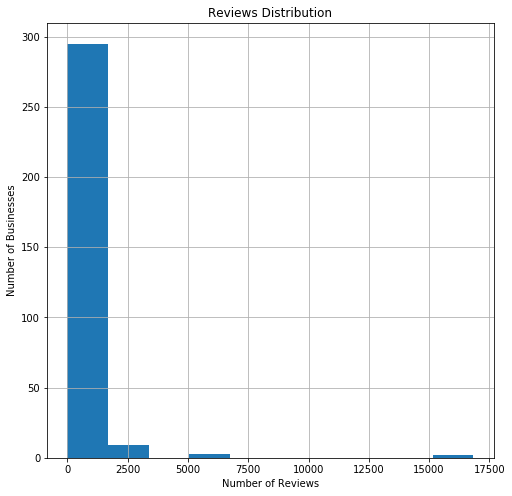

In [45]:
# Explore Ratings and Reviews
plt.figure(figsize=(8,8))
df['Reviews'].hist()
plt.title('Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')